In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.lines import Line2D     
import pandas as pd

In [2]:
def wave(t, phi,T):    ### generating the wave
    return np.sin(2*math.pi*np.array(list(range(t)))/T + phi)



In [3]:
def discretize(x, n):    ### Discretize the wave for showing on 2m pixel of 512 pixels
    m = np.round(x*n)    
    return m

In [4]:
def normal(x, sigma, mean):
    y = (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(x - mean)**2/(2*sigma**2))
    return y

In [5]:
def calc_position(pos1 , pos2):
    
    
    # we assume that pos1 < pos2
    
    new_pos1 = 10**7*(1/633 - 1/pos1)
    new_pos2 = 10**7*(1/634 - 1/pos2)
    
    # if we have correct pos1 and pos2, we should have new_pos1 = new_pos2
    
    return new_pos1
    
    
    

In [6]:
def pixel_to_wavelength(pixel):
    
    wave_length = 640 + 160/1023 * pixel
    
    return wave_length
    
    

In [7]:
def lowpass(x, alpha=0.01):
    data = [x[0]]
    for a in x[1:]:
        data.append(data[-1] + (alpha*(a-data[-1])))
    return np.array(data)

In [8]:
a = np.array([1,2,3,-4])
(a >= 0).astype(int)*a

array([1, 2, 3, 0])

In [9]:

t = 1000
dataframe = np.zeros([512, 1024, t])



first_channel = 256 #difference 7 pixels
second_channel = 263


dataframe[256:,:,:] = 1

phi1 = 0
phi2 = math.pi/2 #rule 1


pivot = 256

amp = 100


ref1 = wave(t, phi1, 100)
ref2 = wave(t, phi2, 100)



first_channel_lambda = 680  #rule 2
second_channel_lambda = 681.16

data = {'X' : [], 'Y' : [], 'position' : [], 'intensity' : []}


frq = 100

for j in range(1014):
    
    if j == 256:
        freq = 100
        
    else: 
        freq = 1000 + np.random.randn(1)[0]*50 #?   

    
#     ref1 = wave(t, phi1, freq)
#     ref2 = wave(t, phi2, freq)
    
#     wave1 = amplitudes[j]*wave(t, phi1 , freq) + np.random.rand(1000) * 0.001
#     loc_wave1 = discretize(wave1, 100) + 256
#     loc_wave1 = loc_wave1.astype(int)

    wave1 = wave(t, phi1 , freq) 

    wave2 = wave(t, phi2, freq)
    
    wave_length = pixel_to_wavelength(j)
    
    wave_length_next_channel = pixel_to_wavelength(j+10)
    
    final_position = calc_position(wave_length, wave_length_next_channel)
    
    
    
    
#     wave2 = amplitudes[j+10]*wave(t, phi2, freq) + np.random.rand(1000) * 0.001
#     loc_wave2 = discretize(wave2, 100) + 256
#     loc_wave2 = loc_wave2.astype(int)

    # We assume that DC value is equal to 0 

    wave1 = wave1 * (wave1 >= 0).astype(int)
    wave2 = wave2 * (wave2 >= 0).astype(int)
    
    In_phase = ref1 * wave1
    In_phase_after_filter = lowpass(In_phase)
    quad = wave2 * ref2
    quad_after_filter = lowpass(quad)

    #magnitude = np.sqrt(In_phase_after_filter + quad_after_filter)**2
    #phase = np.arctan2(np.sqrt(quad_after_filter), np.sqrt(In_phase_after_filter))
    
    decoder = wave(t, phi1, 2*100)
    x = In_phase_after_filter*decoder
    y = quad_after_filter*decoder

    data['X'].append(x)
    data['Y'].append(y)
    data['position'].append(final_position)
    data['intensity'].append(np.mean((np.array(data['X'][j]) + np.array(data['Y'][j]))*decoder))

# fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(12,4)
# axes[0].plot(x)
# axes[1].plot(y)

# axes[0].set_title('Magnitude')
# axes[1].set_title('Phase (Radian)')


Text(0.5, 1.0, 'Wavenumber Space')

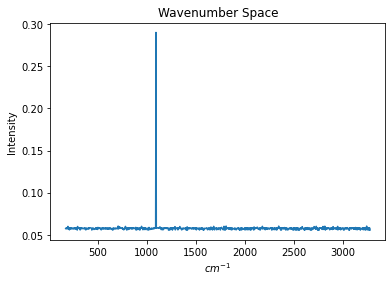

In [10]:
plt.plot(data['position'], data['intensity'])
plt.xlabel("$cm^{-1}$")
plt.ylabel("Intensity")
plt.title('Wavenumber Space')

In [1]:
# plt.plot(data['X'][256])
# plt.plot(data['Y'][256])

In [2]:
# plt.plot(data['X'][256] + data['Y'][256])

In [13]:

t = 1000
dataframe = np.zeros([512, 1024, t])



first_channel = 256
second_channel = 263


dataframe[256:,:,:] = 1

phi1 = 0
phi2 = math.pi/2


pivot = 256

amp = 100



amp1 = 2000

amp2 = 1000

ref1 = amp1 * wave(t, phi1, 100)
ref2 = amp2 * wave(t, phi2, 100)




first_channel_lambda = 680
second_channel_lambda = 681.16

data = {'X' : [], 'Y' : [], 'position' : [], 'intensity' : []}





frq = 100

for j in range(1014):
    
    if j == 256:
        freq = 100
        
    else: 
        freq = 1000 + np.random.randn(1)[0]*50    

    
#     ref1 = wave(t, phi1, freq)
#     ref2 = wave(t, phi2, freq)
    
#     wave1 = amplitudes[j]*wave(t, phi1 , freq) + np.random.rand(1000) * 0.001
#     loc_wave1 = discretize(wave1, 100) + 256
#     loc_wave1 = loc_wave1.astype(int)

    DC = ref1**2 + ref2**2

    wave1 = wave(t, phi1, freq) + DC

    wave2 = wave(t, phi2, freq) + DC
    
    wave_length = pixel_to_wavelength(j)
    
    wave_length_next_channel = pixel_to_wavelength(j+10)
    
    final_position = calc_position(wave_length, wave_length_next_channel) #!!!!! two sticks
    
    
    
    
#     wave2 = amplitudes[j+10]*wave(t, phi2, freq) + np.random.rand(1000) * 0.001
#     loc_wave2 = discretize(wave2, 100) + 256
#     loc_wave2 = loc_wave2.astype(int)

    # We assume that DC value is equal to 0 

    wave1 = wave1 * (wave1 >= DC).astype(int) #wave1 residual 
    wave2 = wave2 * (wave2 >= DC).astype(int)
    
    In_phase = ref1 * wave1
    In_phase_after_filter = lowpass(In_phase)
    quad = wave2 * ref2
    quad_after_filter = lowpass(quad)

    #magnitude = np.sqrt(In_phase_after_filter + quad_after_filter)**2
    #phase = np.arctan2(np.sqrt(quad_after_filter), np.sqrt(In_phase_after_filter))
    
    decoder = wave(t, phi1, 2*100)
    x = In_phase_after_filter*decoder
    y = quad_after_filter*decoder

    data['X'].append(x)
    data['Y'].append(y)
    data['position'].append(final_position)
    data['intensity'].append(np.mean((np.array(data['X'][j]) + np.array(data['Y'][j]))*decoder))

# fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(12,4)
# axes[0].plot(x)
# axes[1].plot(y)

# axes[0].set_title('Magnitude')
# axes[1].set_title('Phase (Radian)')


Text(0.5, 1.0, 'Wavenumber Space')

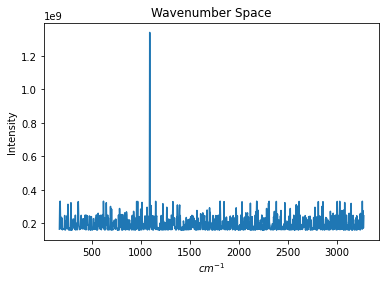

In [14]:
plt.plot(data['position'], data['intensity'])
plt.xlabel("$cm^{-1}$")
plt.ylabel("Intensity")
plt.title('Wavenumber Space')

In [7]:
# plt.plot(data['X'][256])
# plt.plot(data['Y'][256])

In [6]:
# plt.plot(data['X'][444] + data['Y'][444])

## Noise added to the input signals

In [17]:

t = 1000
dataframe = np.zeros([512, 1024, t])



first_channel = 256
second_channel = 263


#dataframe[256:,:,:] = 1

phi1 = 0
phi2 = math.pi/2


pivot = 256

amp = 100



amp1 = 1

amp2 = 1

ref1 = amp1 * wave(t, phi1, 100)
ref2 = amp2 * wave(t, phi2, 100)




first_channel_lambda = 680
second_channel_lambda = 681.16

data = {'X' : [], 'Y' : [], 'position' : [], 'intensity' : []}





frq = 100

for j in range(1014):
    
    if j == 256:
        freq = 100
        
    else: 
        freq = 1000 + np.random.randn(1)[0]*50    

    
#     ref1 = wave(t, phi1, freq)
#     ref2 = wave(t, phi2, freq)
    
#     wave1 = amplitudes[j]*wave(t, phi1 , freq) + np.random.rand(1000) * 0.001
#     loc_wave1 = discretize(wave1, 100) + 256
#     loc_wave1 = loc_wave1.astype(int)

    DC = ref1**2 + ref2**2

    wave1 = wave(t, phi1, freq) + DC + np.random.rand(1000) * 0.001

    wave2 = wave(t, phi2, freq) + DC + np.random.rand(1000) * 0.001
    
    wave_length = pixel_to_wavelength(j)
    
    wave_length_next_channel = pixel_to_wavelength(j+10)
    
    final_position = calc_position(wave_length, wave_length_next_channel)
    
    
    
    
#     wave2 = amplitudes[j+10]*wave(t, phi2, freq) + np.random.rand(1000) * 0.001
#     loc_wave2 = discretize(wave2, 100) + 256
#     loc_wave2 = loc_wave2.astype(int)

    # We assume that DC value is equal to 0 

    wave1 = wave1 * (wave1 >= DC).astype(int)
    wave2 = wave2 * (wave2 >= DC).astype(int)
    
    In_phase = ref1 * wave1
    In_phase_after_filter = lowpass(In_phase)
    quad = wave2 * ref2
    quad_after_filter = lowpass(quad)

    #magnitude = np.sqrt(In_phase_after_filter + quad_after_filter)**2
    #phase = np.arctan2(np.sqrt(quad_after_filter), np.sqrt(In_phase_after_filter))
    
    decoder = wave(t, phi1, 2*100)
    x = In_phase_after_filter*decoder
    y = quad_after_filter*decoder

    data['X'].append(x)
    data['Y'].append(y)
    data['position'].append(final_position)
    data['intensity'].append(np.mean((np.array(data['X'][j]) + np.array(data['Y'][j]))*decoder))

# fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(12,4)
# axes[0].plot(x)
# axes[1].plot(y)

# axes[0].set_title('Magnitude')
# axes[1].set_title('Phase (Radian)')


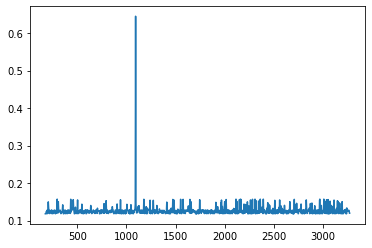

In [18]:
plt.plot(data['position'], data['intensity'])

In [3]:
# plt.plot((data['X'][256] + data['Y'][256])*decoder)
# #plt.plot(data['Y'][256])

In [4]:
# plt.plot((data['X'][246] + data['Y'][246])*decoder)

In [21]:
#wave1 = amplitudes[first_channel]*wave(t, phi1, 100) + np.random.rand() * 0.1
loc_wave1 = discretize(wave1 - np.mean(wave1), 100) + 256
loc_wave1 = loc_wave1.astype(int)

#wave2 = amplitudes[second_channel]*wave(t, phi1 + np.pi/2, 100) + np.random.rand() * 0.1
loc_wave2 = discretize(wave2 - np.mean(wave2), 100) + 256
loc_wave2 = loc_wave2.astype(int)

dataframe1 = dataframe.copy()

#dataframe1[256:,:,:] = 1

for first_channel in range(0,1014):
    second_channel = first_channel + 10

    for i in range(t):

        if loc_wave1[i] > 256: 
            dataframe1[256:loc_wave1[i], first_channel, i] = 1
        else:
            dataframe1[loc_wave1[i]:256, first_channel, i] = 1


        if loc_wave2[i] > 256: 
            dataframe1[256:loc_wave2[i], second_channel, i] = 1
        else:
            dataframe1[loc_wave2[i]:256, second_channel, i] = 1



In [5]:
# plt.imshow(1 - dataframe1[:,:,5], cmap = 'gray', extent = [0,1024, 0, 513])

In [23]:
t

1000